# Data analysis with Pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Loading pandas and our data

In [92]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# select an interactive "notebook" plot style
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('filmi.csv', index_col='id')

Let's take a look at the data.

In [93]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


## Inspecting the data

Sort the data by rating.

In [4]:
filmi.sort_values('ocena', ascending=False)

,naslov,dolzina,leto,ocena,opis
id,,,,,
5813916,Dag II,135,2016,9.4,In a desolate war zone where screams of the in...
111161,Kaznilnica odrešitve,142,1994,9.3,Two imprisoned men bond over a number of years...
68646,Boter,175,1972,9.2,The aging patriarch of an organized crime dyna...
71562,"Boter, II. del",202,1974,9.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,When the menace known as the Joker emerges fro...
...,...,...,...,...,...
1098327,Dragonball Evolution,85,2009,2.6,The young warrior Son Goku sets out on a quest...
185183,Battlefield Earth,118,2000,2.4,It's the year 3000 A.D.; the Earth is lost to ...
799949,Velik film,86,2007,2.3,A comedic satire of films that are large in sc...


Extract the 'ocena' column.

In [10]:
filmi.ocena

id
111161     9.3
468569     9.0
1375666    8.8
137523     8.8
110912     8.9
          ... 
53472      7.9
416315     6.3
1740707    7.0
113071     5.9
116225     5.7
Name: ocena, Length: 2500, dtype: float64

There is a difference between `filmi['ocena']` and `filmi[['ocena']]`:

In [11]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


The columns of dataframes are `Series`. Using single brackets extracts a `Series` (think: a vector, no further structure), double brackets extracts a sub-`DataFrame`. Most of the operations we perform (grouping, joining, plotting, filtering, ...) operate on dataframes. 

A `Series` is used for example if we want to add a column to a dataframe.

Round the extracted rating series to the nearest integer using the `round()` function.

In [13]:
zaokrozena_ocena = round(filmi.ocena)
zaokrozena_ocena

id
111161     9.0
468569     9.0
1375666    9.0
137523     9.0
110912     9.0
          ... 
53472      8.0
416315     6.0
1740707    7.0
113071     6.0
116225     6.0
Name: ocena, Length: 2500, dtype: float64

Add the rounded value to the filmi dataframe.

In [24]:
filmi['zaokrozena_ocena'] = zaokrozena_ocena
filmi

,naslov,dolzina,leto,ocena,opis,zaokrozena_ocena
id,,,,,,
111161,Kaznilnica odrešitve,142,1994,9.3,Two imprisoned men bond over a number of years...,9.0
468569,Vitez teme,152,2008,9.0,When the menace known as the Joker emerges fro...,9.0
1375666,Izvor,148,2010,8.8,A thief who steals corporate secrets through t...,9.0
137523,Klub golih pesti,139,1999,8.8,An insomniac office worker and a devil-may-car...,9.0
110912,Šund,154,1994,8.9,"The lives of two mob hitmen, a boxer, a gangst...",9.0
...,...,...,...,...,...,...
53472,Do zadnjega diha,90,1960,7.9,A small-time thief steals a car and impulsivel...,8.0
416315,Wolf Creek,99,2005,6.3,Three backpackers stranded in the Australian o...,6.0
1740707,Trolljegeren,103,2010,7.0,A group of students investigates a series of m...,7.0


Remove the newly added column using the `.drop()` method with a `columns = ` argument.

In [26]:
filmi = filmi.drop(columns=['zaokrozena_ocena'])
filmi

,naslov,dolzina,leto,ocena,opis
id,,,,,
111161,Kaznilnica odrešitve,142,1994,9.3,Two imprisoned men bond over a number of years...
468569,Vitez teme,152,2008,9.0,When the menace known as the Joker emerges fro...
1375666,Izvor,148,2010,8.8,A thief who steals corporate secrets through t...
137523,Klub golih pesti,139,1999,8.8,An insomniac office worker and a devil-may-car...
110912,Šund,154,1994,8.9,"The lives of two mob hitmen, a boxer, a gangst..."
...,...,...,...,...,...
53472,Do zadnjega diha,90,1960,7.9,A small-time thief steals a car and impulsivel...
416315,Wolf Creek,99,2005,6.3,Three backpackers stranded in the Australian o...
1740707,Trolljegeren,103,2010,7.0,A group of students investigates a series of m...


### Side-note: slices
Selecting a sub-dataframe creates a "slice".
A slice is a view defined by reference to a different dataframe,
and cannot be altered directly. Instead, we have to create a copy
of the portion selected by the slice by calling the `.copy()` method on that slice, and can then alter that copy.


Select the slice corresponding to the columns `naslov`, `leto`, and `glasovi` from `filmi`, and add a column with the rounded rating to it.

In [37]:
filmi[['naslov', 'leto']].copy() 
# poglej v resitvi ne razumem glih kaj naredi .copy()

,naslov,leto
id,,
111161,Kaznilnica odrešitve,1994
468569,Vitez teme,2008
1375666,Izvor,2010
137523,Klub golih pesti,1999
110912,Šund,1994
...,...,...
53472,Do zadnjega diha,1960
416315,Wolf Creek,2005
1740707,Trolljegeren,2010


### Filtering data

Create a filter that selects films from before 1930, and one for films from after 2017.
Combine them to select films from before 1930 or after 2017.

In [43]:
zelo_stari_filmi = filmi[filmi.leto < 1930]
novi_filmi = filmi[filmi.leto > 2017]
novi_in_stari_filmi = filmi[(filmi.leto < 1930) | (filmi.leto > 2017)]
novi_in_stari_filmi

,naslov,dolzina,leto,ocena,opis
id,,,,,
4154756,Maščevalci: Brezmejna vojna,149,2018,8.6,The Avengers and their allies must be willing ...
1825683,Black Panther,134,2018,7.4,"T'Challa, heir to the hidden but advanced king..."
5463162,Deadpool 2,119,2018,7.9,Foul-mouthed mutant mercenary Wade Wilson (AKA...
1677720,Igralec st. 1,140,2018,7.6,When the creator of a virtual reality world ca...
6644200,A Quiet Place,90,2018,7.7,"In a post-apocalyptic world, a family is force..."
...,...,...,...,...,...
2548396,The Cloverfield Paradox,102,2018,5.6,"Orbiting a planet on the brink of war, scienti..."
17925,General,67,1926,8.2,When Union spies steal an engineer's beloved l...
1270797,Venom,112,2018,7.1,When Eddie Brock acquires the powers of a symb...


Define a function that splits a string into words and tests if the number of words is at most two, then select the films with a name no longer than two words and a rating greater than 8.

Hint: Use the `.apply()` method to create a filter from the `naslov` column.

In [49]:
def razbij_niz(niz):
    besede = niz.split()
    if len(besede) > 2:
        return True
    else:
        return False
    
filmi[(filmi.naslov.apply(razbij_niz) == False) & (filmi.ocena > 8)]

,naslov,dolzina,leto,ocena,opis
id,,,,,
111161,Kaznilnica odrešitve,142,1994,9.3,Two imprisoned men bond over a number of years...
468569,Vitez teme,152,2008,9.0,When the menace known as the Joker emerges fro...
1375666,Izvor,148,2010,8.8,A thief who steals corporate secrets through t...
110912,Šund,154,1994,8.9,"The lives of two mob hitmen, a boxer, a gangst..."
109830,Forrest Gump,142,1994,8.8,"The presidencies of Kennedy and Johnson, Vietn..."
...,...,...,...,...,...
4016934,Služkinja,144,2016,8.1,A woman is hired as a handmaiden to a Japanese...
4857264,Contratiempo,106,2016,8.1,"While the clock is ticking, with the aid of a ..."
69293,Solaris,167,1971,8.1,A psychologist is sent to a station orbiting a...


### Histograms: Counting frequencies of values

Group the films by rating, then number of occurances of each rating.

In [96]:
grupirano = filmi.groupby('ocena').size().sort_values(ascending=False).head(10)
grupirano

ocena
7.3    132
6.6    116
7.6    114
7.2    113
7.0    109
7.1    109
6.5     97
7.8     96
6.7     96
8.0     96
dtype: int64

Create a bar plot of this data.

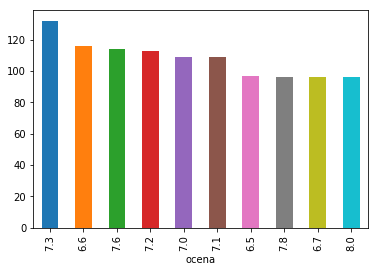

In [97]:
grupirano.plot.bar()

Dataframes have a built-in `.hist()` method that allows creating histograms for each column. Use this method to create a corresponding plot for the simplified data.

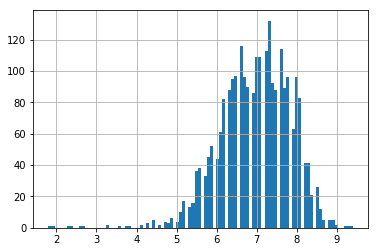

In [73]:
filmi.ocena.hist(bins=100)

### Plot the average film length by year

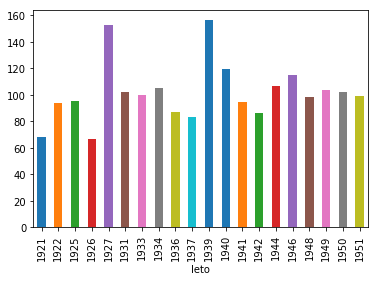

In [94]:
filmi.groupby('leto').mean().dolzina.head(20).plot.bar()

### Plot the sum of the revenues by year

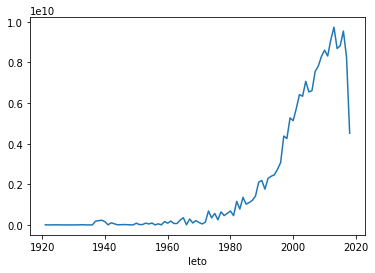

In [95]:
filmi.groupby('leto').sum().zasluzek.plot()